In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display

In [2]:
plt.style.use('seaborn-v0_8-muted')
plt.rcParams['figure.figsize'] = (14, 5)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'

[&larr; Back to Index](index.html)

# Magnitude Scaling

Often, the raw amplitude of a signal in the time- or frequency-domain is not as perceptually relevant to humans as the amplitude converted into other units, e.g. using a logarithmic scale.

For example, let's consider a pure tone whose amplitude grows louder linearly. Define the time variable:

In [3]:
T = 4.0      # duration in seconds
sr = 22050   # sampling rate in Hertz
t = numpy.linspace(0, T, int(T*sr), endpoint=False)

Create a signal whose amplitude grows linearly:

In [4]:
amplitude = numpy.linspace(0, 1, int(T*sr), endpoint=False) # time-varying amplitude
x = amplitude*numpy.sin(2*numpy.pi*440*t)

Listen:

In [5]:
ipd.Audio(x, rate=sr)

Plot the signal:

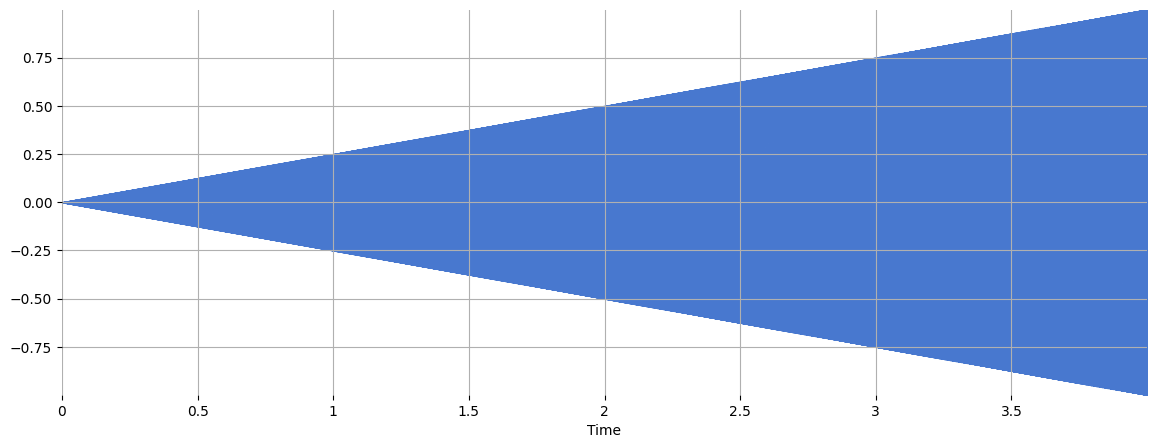

In [6]:
librosa.display.waveshow(x, sr=sr);

Now consider a signal whose amplitude grows exponentially, i.e. the logarithm of the amplitude is linear:

In [7]:
amplitude = numpy.logspace(-2, 0, int(T*sr), endpoint=False, base=10.0)
x = amplitude*numpy.sin(2*numpy.pi*440*t)

In [8]:
ipd.Audio(x, rate=sr)

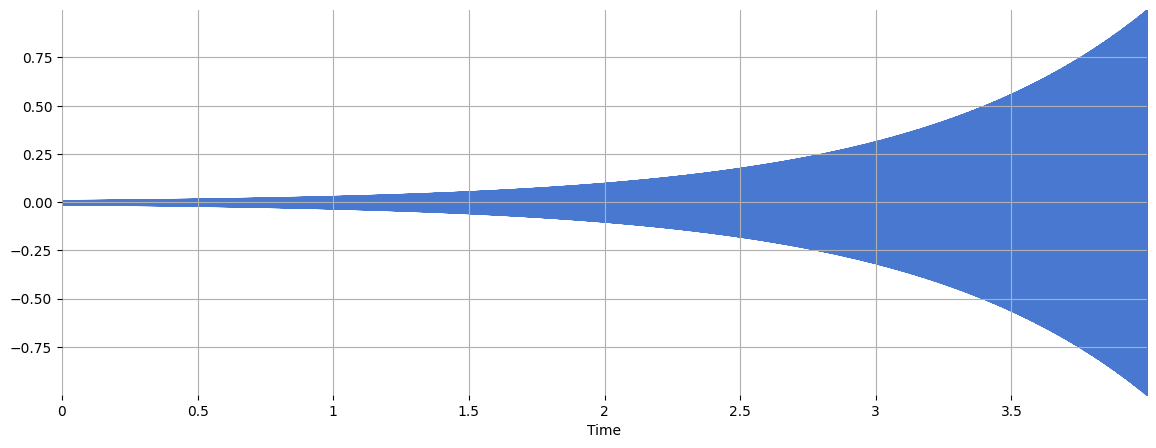

In [9]:
librosa.display.waveshow(x, sr=sr);

Even though the amplitude grows exponentially, to us, the increase in loudness seems more gradual. This phenomenon is an example of the Weber-Fechner law ([Wikipedia](https://en.wikipedia.org/wiki/Weber%E2%80%93Fechner_law)) which states that the relationship between a stimulus and human perception is logarithmic.

## Spectrogram Visualization: Linear Amplitude

Let's plot a magnitude spectrogram where the colorbar is a linear function of the spectrogram values, i.e. just plot the raw values.

In [10]:
x, sr = librosa.load('audio/latin_groove.mp3', duration=8)
ipd.Audio(x, rate=sr)

In [11]:
X = librosa.stft(x)
X.shape

(1025, 345)

Raw amplitude:

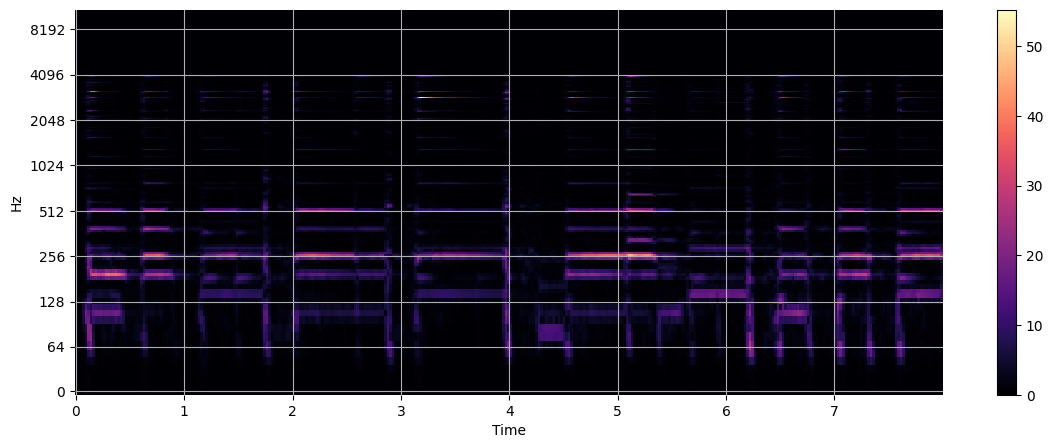

In [12]:
Xmag = abs(X)
librosa.display.specshow(Xmag, sr=sr, x_axis='time', y_axis='log')
plt.colorbar();

## Spectrogram Visualization: Log Amplitude

Now let's plot a magnitude spectrogram where the colorbar is a logarithmic function of the spectrogram values.

Decibel ([Wikipedia](https://en.wikipedia.org/wiki/Decibel))

[`librosa.amplitude_to_db`](https://librosa.github.io/librosa/generated/librosa.core.amplitude_to_db.html#librosa.core.amplitude_to_db):

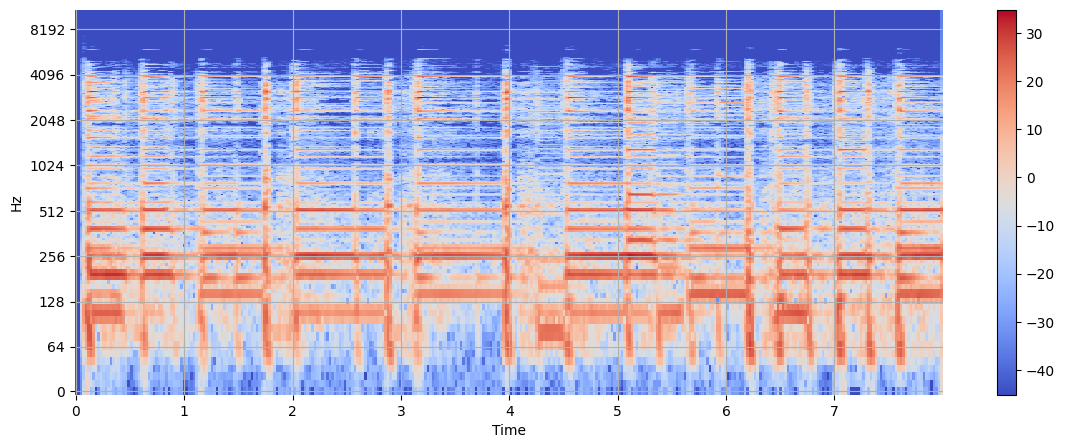

In [13]:
Xdb = librosa.amplitude_to_db(Xmag)
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar();

One common variant is the $\log (1 + \lambda x)$ function, sometimes known as **logarithmic compression** (FMP, p. 125). This function operates like $y = \lambda x$ when $\lambda x$ is small, but it operates like $y = \log \lambda x$ when $\lambda x$ is large.

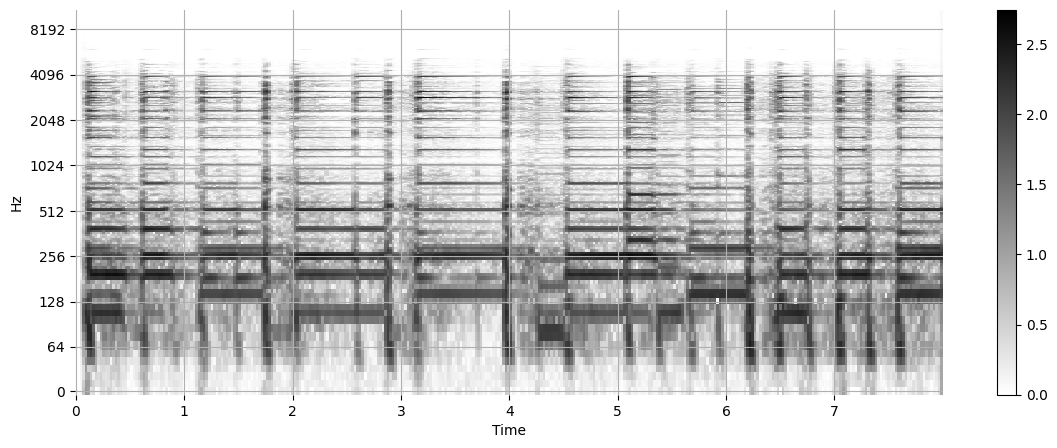

In [14]:
Xmag = numpy.log10(1+10*abs(X))
librosa.display.specshow(Xmag, sr=sr, x_axis='time', y_axis='log', cmap="gray_r")
plt.colorbar();

## Spectrogram Visualization: Perceptual Weighting

[`librosa.perceptual_weighting`](https://librosa.github.io/librosa/generated/librosa.core.perceptual_weighting.html#librosa.core.perceptual_weighting):

In [15]:
freqs = librosa.core.fft_frequencies(sr=sr)

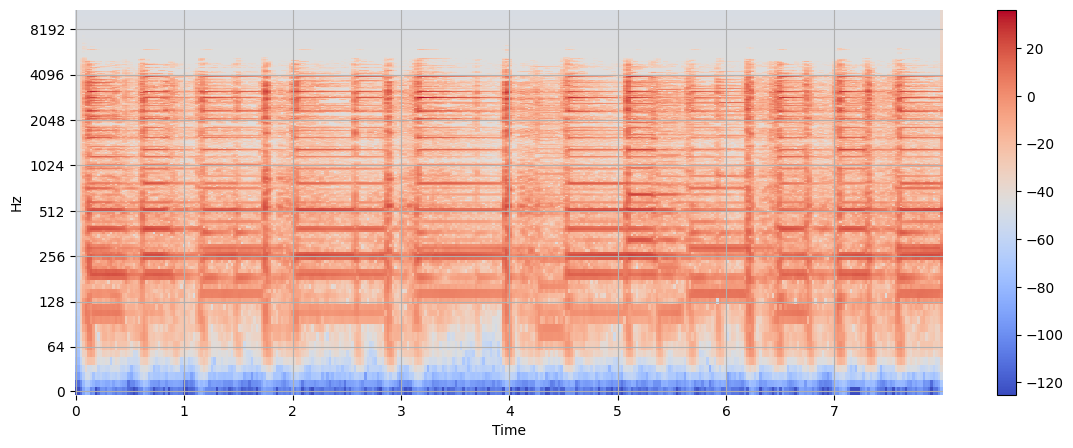

In [16]:
Xmag = librosa.perceptual_weighting(abs(X)**2, freqs)
librosa.display.specshow(Xmag, sr=sr, x_axis='time', y_axis='log')
plt.colorbar();

[&larr; Back to Index](index.html)